# M1. Actividad - Agente Aspiradora

**Jessica Nicole Copado Leal - A01637876**

In [1]:
# Import libraries

# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

In [2]:
# Class that models the vacuum simulation with three phases: 
# 1. The initial setup of the agents and the environment
# 2. The process of vacumming depending on the condition (0, 1, 2)
# 3. The final process that checks whether it's done vacuuming

class Vacuum(ap.Model):

    def setup(self):

        # Create agents (tiles)
        n_tiles = int(self.p['Tile density'] * (self.p.size**2))
        tiles = self.agents = ap.AgentList(self, n_tiles)

        # Create grid (room)
        self.room = ap.Grid(self, [self.p.size]*2, track_empty=True)
        self.room.add_agents(tiles, random=True, empty=True)

        # Initiate a dynamic variable for all tiles
        # Condition 0: Dirty, 1: In the process of being cleaned, 2: Cleaned
        self.agents.condition = 0

        # Start the cleaning process from the left side of the room
        unfortunate_tiles = self.room.agents[0:self.p.size, 0:2]
        unfortunate_tiles.condition = 1

    def step(self):

        # Select tile being cleaned
        cleaning_tile = self.agents.select(self.agents.condition == 1)

        # Spread fire
        for tile in cleaning_tile:
            for neighbor in self.room.neighbors(tile):
                if neighbor.condition == 0:
                    neighbor.condition = 1 # Neighbor starts to be cleaned
            tile.condition = 2 # Tile is cleaned

        # Stop simulation if all tiles are cleaned
        if len(cleaning_tile) == 0:
            self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        cleaned_tiles = len(self.agents.select(self.agents.condition == 2))
        self.report('Percentage of cleaned tiles',
                    cleaned_tiles / len(self.agents))

In [3]:
# Define parameters

parameters = {
    'Tile density': 0.8, # Percentage of grid covered by tiles
    'size': 50, # Height and length of the grid
    'steps': 100,
}

In [4]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('condition')
    color_dict = {0:'#808080', 1:'#fff2cc', 2:'#ffffff', None:'#eeeeee'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a vacuum cleaner in a room\n"
                 f"Time-step: {model.t}, Tiles left to be cleaned: "
                 f"{len(model.agents.select(model.agents.condition == 0))}", color= '#ffffff')

fig, ax = plt.subplots()
model = Vacuum(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))

In [5]:
# Change in parameters to obtain different outcomes

# Prepare parameter sample
parameters = {
    'Tile density': ap.Range(0.2, 0.8),
    'size': 100
}
sample = ap.Sample(parameters, n=40)

# Perform experiment
exp = ap.Experiment(Vacuum, sample, iterations=30)
results = exp.run()

Scheduled runs: 1200
Completed: 1200, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:03:49.003512


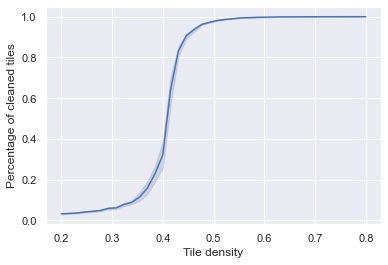

In [6]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='Tile density',
    y='Percentage of cleaned tiles'
);